In [4]:
import pandas as pd
import numpy as np
import csv

1\. **Text files**

Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named `data_int.txt`. Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named `data_float.txt`. Use the `cat` command to print the content of the file.
+ load the `txt` file of the previous point and convert it to a `csv` file by hand.

In [5]:
a_list = [1,2,3,4,5,6]
print(type(a_list[0]))
with open('data_int.txt', 'w') as f:
    for item in a_list:
        f.write("%s " % item)
print("File data_int:")
!cat data_int.txt

x = np.random.random((5,5))
mat = np.matrix(x)
with open('data_float.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')
 
print("\n\nFile data_float:")
!cat data_float.txt     


with open('data_float.txt', 'r') as in_file:
    lines = in_file.read().splitlines()
    stripped = [line.replace(","," ").split() for line in lines]
    grouped = zip(*[stripped]*1)
    with open('data_float.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        for group in grouped:
            writer.writerows(group)

<class 'int'>
File data_int:
1 2 3 4 5 6 

File data_float:
0.38 0.33 0.63 0.73 0.44
0.87 0.91 0.35 0.89 0.50
0.10 0.06 0.11 0.77 0.43
0.13 0.76 0.14 0.74 0.76
0.04 0.91 0.58 0.22 0.89


2\. **JSON files**

Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [6]:
import csv  
import json 
data = json.load(open('user_data.json'))
array1 = []

header = ["CreditCardType","ID","JobTitle","EmailAddress","FirstNameLastName","CreditCard"]

for i in range (len(data)):
    if data[i]["CreditCardType"] == "American Express":
        print("The User with Credit Type:{}, ID:{}, Job Title:{}, email adress:{},Name:{},Credit Card:{} .".format(data[i]["CreditCardType"],data[i]["ID"],data[i]["JobTitle"],data[i]["EmailAddress"],data[i]["FirstNameLastName"],data[i]["CreditCard"]))
        array = [data[i]["CreditCardType"],data[i]["ID"],data[i]["JobTitle"],data[i]["EmailAddress"],data[i]["FirstNameLastName"],data[i]["CreditCard"]]
        array1.append(array)
        array1.append("\n")

with open('new_user_data.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(array1)

       

The User with Credit Type:American Express, ID:2, Job Title:Investment  Advisor, email adress:Clint_Thorpe5003@bulaffy.com,Name:Clint Thorpe,Credit Card:7083-8766-0251-2345 .
The User with Credit Type:American Express, ID:12, Job Title:Retail Trainee, email adress:Phillip_Carpenter9505@famism.biz,Name:Phillip Carpenter,Credit Card:3657-0088-0820-5247 .
The User with Credit Type:American Express, ID:28, Job Title:Project Manager, email adress:Russel_Graves1378@extex.org,Name:Russel Graves,Credit Card:6718-4818-8011-6024 .
The User with Credit Type:American Express, ID:39, Job Title:Stockbroker, email adress:Leanne_Newton1268@typill.biz,Name:Leanne Newton,Credit Card:5438-0816-4166-4847 .
The User with Credit Type:American Express, ID:57, Job Title:Budget Analyst, email adress:Tony_Giles1960@iatim.tech,Name:Tony Giles,Credit Card:8130-3425-7573-7745 .
The User with Credit Type:American Express, ID:62, Job Title:CNC Operator, email adress:Owen_Allcott5125@bauros.biz,Name:Owen Allcott,Cred

3\. **CSV files with Pandas**

Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [7]:
import json
data = pd.read_csv("mushrooms_categorized.csv") 
gk = data.groupby('class')
class0 = gk.get_group(0)   
mean_class0 = class0.mean()
print("Mean values for the class 0:\n",mean_class0,"\n")
mean_class1_json0 = mean_class0.to_json()
jsonString0 = json.dumps(mean_class1_json0)
jsonFile0 = open("mean_class0_json1.json", "w")
jsonFile0.write(jsonString0)
jsonFile0.close()

class1 = gk.get_group(1)   
mean_class1 = class1.mean()
print("Mean values for the class 1:\n",mean_class1)         
mean_class1_json1 = mean_class1.to_json()

jsonString = json.dumps(mean_class1_json1)
jsonFile = open("mean_class1_json1.json", "w")
jsonFile.write(jsonString)
jsonFile.close()

Mean values for the class 0:
 class                       0.000000
cap-shape                   3.266160
cap-surface                 1.615970
cap-color                   4.581749
bruises                     0.653992
odor                        4.334601
gill-attachment             0.954373
gill-spacing                0.285171
gill-size                   0.068441
gill-color                  6.622624
stalk-shape                 0.615970
stalk-root                  1.498099
stalk-surface-above-ring    1.775665
stalk-surface-below-ring    1.798479
stalk-color-above-ring      6.098859
stalk-color-below-ring      6.064639
veil-type                   0.000000
veil-color                  1.931559
ring-number                 1.125475
ring-type                   3.007605
spore-print-color           3.201521
population                  3.283270
habitat                     1.148289
dtype: float64 

Mean values for the class 1:
 class                       1.000000
cap-shape                   3.43615

4\. **Reading the credit card numbers**

Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [8]:
with open('credit_card.dat','rb') as read_dat:
    line = read_dat.readlines() 
    for row in line:
        if(len(row) > 5): 
            utf_2_strng = row.decode("utf-8")
            utf_2_strng = utf_2_strng[0:114]   
            start_digit = 0
            digit_space = 6
            card_digits=[]
            for i in range(19):
                end_digit = start_digit + digit_space
                digits_4 = utf_2_strng[start_digit:(start_digit + digit_space)]
                card_digits.append(digits_4)
                start_digit = start_digit + digit_space                
            credit_card = ""
            counter = 1
            for i in range(0,19):
                credit_card = credit_card + chr(int(card_digits[i],2))
            print("The Credit Card is :",credit_card)

The Credit Card is : 7648 5673 3775 2271
The Credit Card is : 3257 8247 3354 2266
The Credit Card is : 2722 0001 4011 6652
The Credit Card is : 0661 3063 3742 3150
The Credit Card is : 0432 1608 1462 4742
The Credit Card is : 5827 2027 8785 7303
The Credit Card is : 5774 8528 2087 1117
The Credit Card is : 8140 1210 6352 2845
The Credit Card is : 5764 1133 7301 7100
The Credit Card is : 6456 1737 4126 6726
The Credit Card is : 1228 8631 7382 0000
The Credit Card is : 7051 0160 5374 3166
The Credit Card is : 0618 3587 1630 6376
The Credit Card is : 1545 5454 7444 5636
The Credit Card is : 6735 3116 3202 6834
The Credit Card is : 7287 5011 1547 8413
The Credit Card is : 7033 2607 3328 4200
The Credit Card is : 2568 5244 1874 5024
The Credit Card is : 1684 2253 7570 7118
The Credit Card is : 0672 2576 0575 6631
The Credit Card is : 6332 8353 8787 1340
The Credit Card is : 1813 3361 1175 4211
The Credit Card is : 2477 6450 8840 2368
The Credit Card is : 5512 3505 2563 1326
The Credit Card 

5\. **Write data to a binary file**

a) Start from the `data/data_000637.txt` file that we have used during the previous lectures, and convert it to a binary file according to the format defined below:

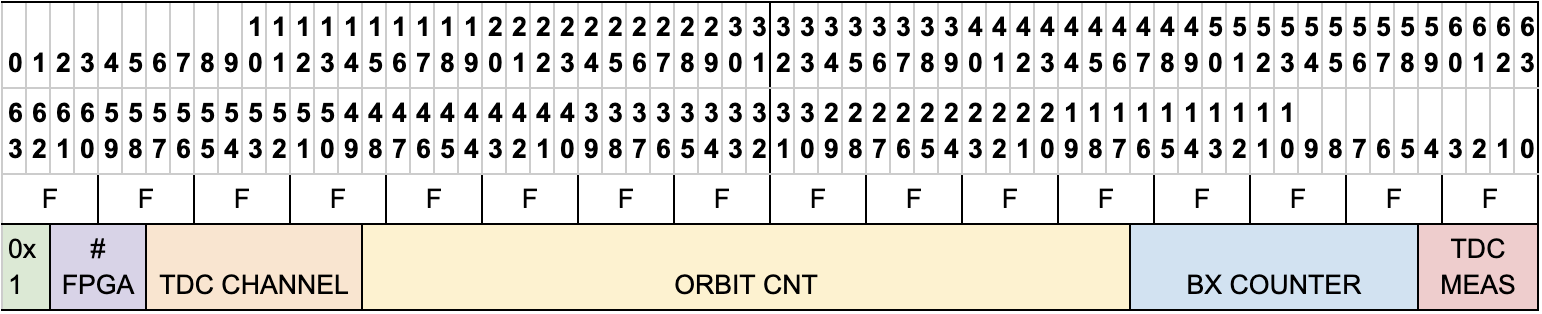

In [19]:
from IPython.display import Image
Image("images/data_format.png")

*Hints*:
- Read the first 10 lines using Pandas
- Iterate over the DataFrame rows
- For every row, ``pack'' the values (features) into a single 64-bit word, according to the format specified above. Use bit-wise shifts and operators to do so.
- Write each 64-bit word to a binary file. You can use `struct` in this way:
```
binary_file.write( struct.pack('<q', word) )
```
where `word` is the 64-bit word.
- Close the file after completing the loop.

b) Check that the binary file is correctly written by reading it with the code used in the lecture `06_OSEMN.ipynb`, and verify that the content of the `txt` and binary files is consistent.

c) What is the difference of the size on disk between equivalent `txt` and binary files?